In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 11, 7
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 16
# Load the TensorBoard log file
def read_tb(log_file='lightning_logs/version_1/'):
    data = []
    event_acc = EventAccumulator(log_file)
    event_acc.Reload()

    # Extract the scalar data
    for tag in event_acc.Tags()['scalars']:
        events = event_acc.Scalars(tag)
        data.extend([(e.step, tag, e.value) for e in events])

    # Print the data
    return data

In [2]:
files = [f'lightning_logs/version_{i}/' for i in [1, 2, 3]]
datas = []
for file in files:
    datas += read_tb(file)

In [2]:
def normalize_steps(arr):
    for i in range(len(arr)-1):
        if arr[i + 1][0] < arr[i][0]:
            arr[i+1] = list(arr[i+1])
            arr[i + 1][0] += arr[i][0] 
            arr[i+1] = tuple(arr[i+1])
    return arr

In [4]:
val_recall_lora = normalize_steps(list(filter(lambda x: x[1] == 'val_recall', datas)))
val_precision_lora = normalize_steps(list(filter(lambda x: x[1] == 'val_precision', datas)))
val_f1_lora = normalize_steps(list(filter(lambda x: x[1] == 'val_f1', datas)))
val_loss_lora = normalize_steps(list(filter(lambda x: x[1] == 'val_loss', datas)))

In [8]:
files = [f'lightning_logs/version_{i}/' for i in [4, 5, 6]]
datas = []
for file in files:
    datas += read_tb(file)

In [9]:
val_recall_adapter = normalize_steps(list(filter(lambda x: x[1] == 'val_recall', datas)))
val_precision_adapter = normalize_steps(list(filter(lambda x: x[1] == 'val_precision', datas)))
val_f1_adapter = normalize_steps(list(filter(lambda x: x[1] == 'val_f1', datas)))
val_loss_adapter = normalize_steps(list(filter(lambda x: x[1] == 'val_loss', datas)))

In [9]:
def plot_xy(lora, adapter, task='st'):
    """
    Plots the x and y coordinates with style.

    Parameters:
    - x: the x coordinates
    - y: the y coordinates

    Returns:
    - None
    """
    x = list(map(lambda x: x[0], lora))[:len(adapter)]
    y = list(map(lambda x: x[2], lora))[:len(adapter)]
    metric_name = lora[0][1]
    sns.set_style('darkgrid')
    plt.plot(x, y, color='blue', linewidth=2, label='LoRA')
    
    x = list(map(lambda x: x[0], adapter))
    y = list(map(lambda x: x[2], adapter))
    
    plt.plot(x, y, color='red', linewidth=2, label='Adapter only')
    if task != 'st':
        if metric_name == 'val_precision':
            plt.plot(x, [0.224 for _ in x], linewidth=2, label='Human')
        if metric_name == 'val_recall':
            plt.plot(x, [0.223 for _ in x], linewidth=2, label='Human')
        if metric_name == 'val_f1':
            plt.plot(x, [0.223 * 0.224 * 2 / (0.223 + 0.224) for _ in x], linewidth=2, label='Human')
    plt.ylabel(metric_name)
    plt.xlabel('steps')
    
    plt.title(f'{metric_name} vs steps')
    plt.legend()
    plt.show()

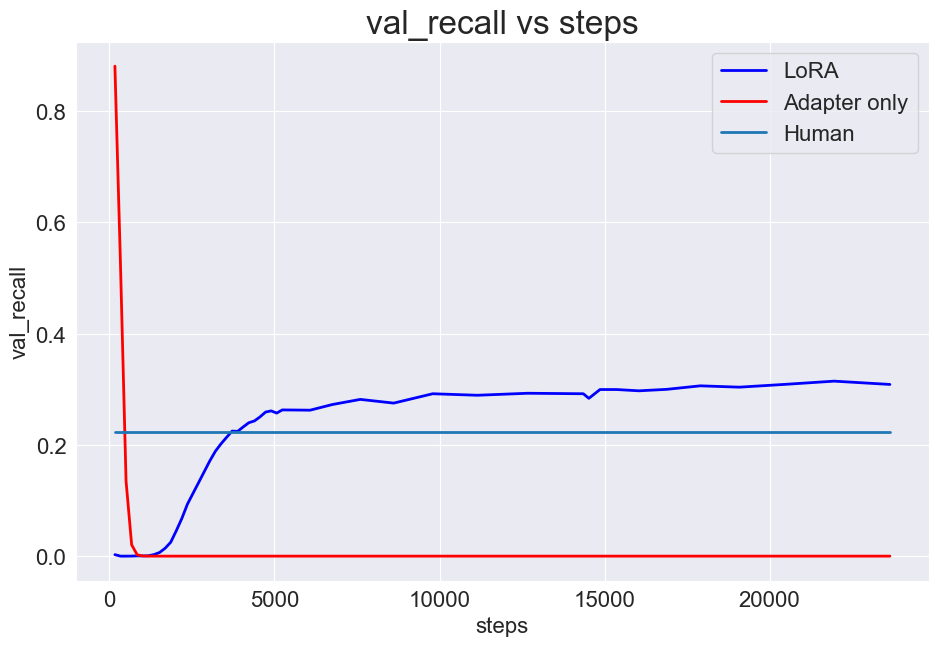

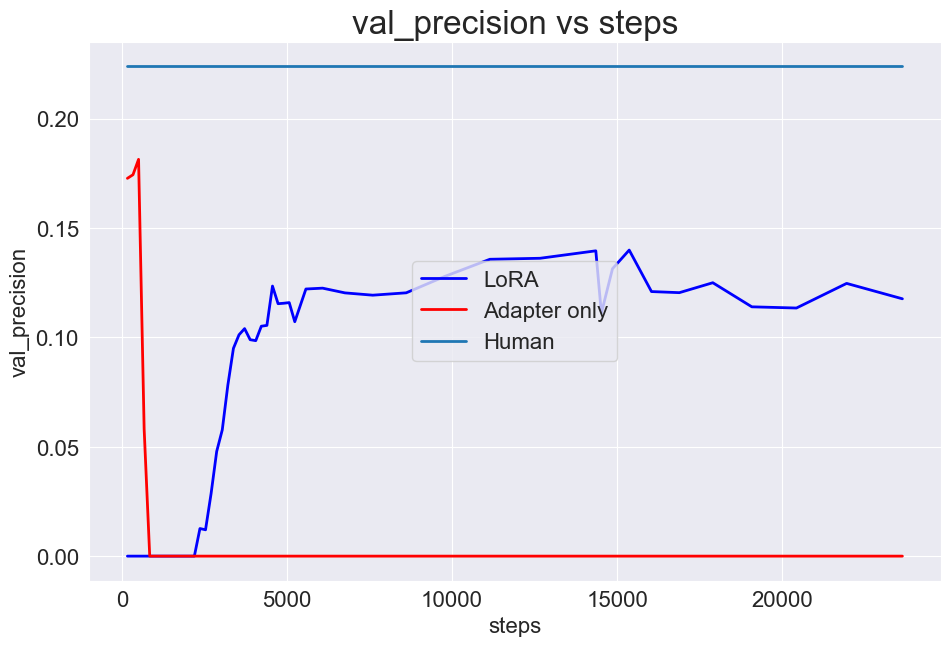

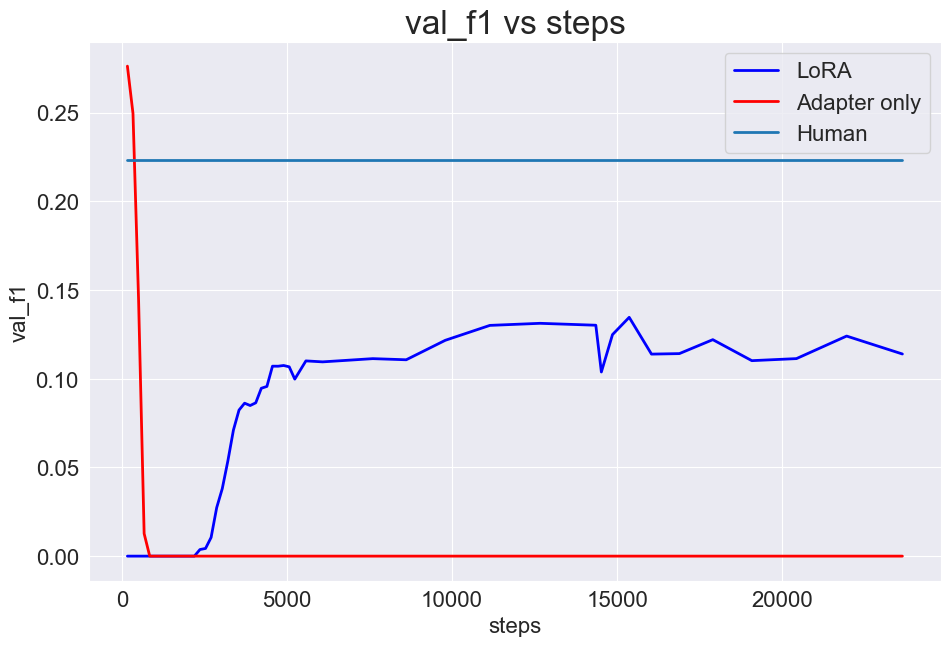

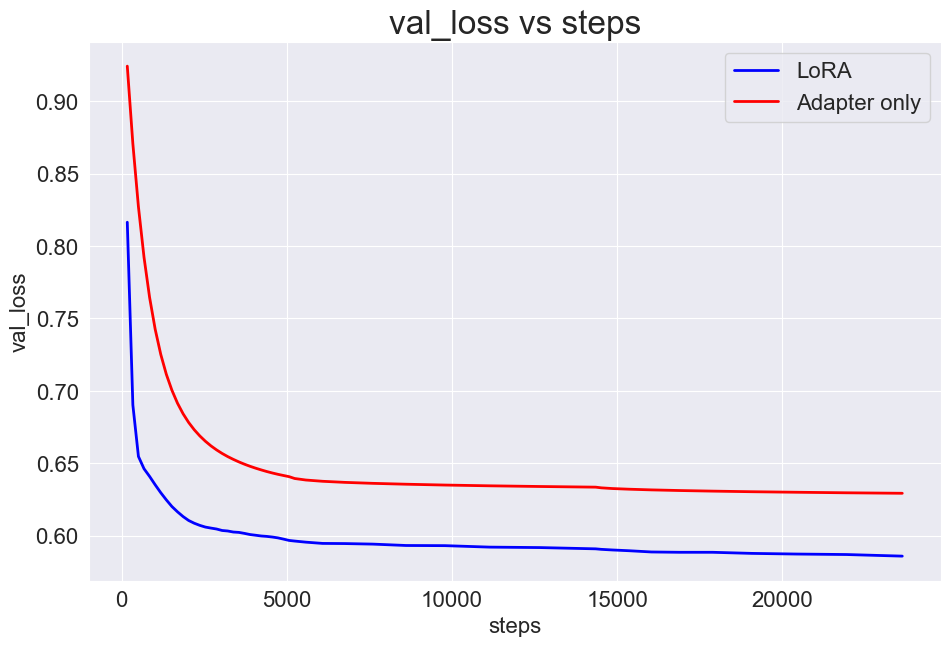

In [8]:
plot_xy(val_recall_lora, val_recall_adapter)
plot_xy(val_precision_lora, val_precision_adapter)
plot_xy(val_f1_lora, val_f1_adapter)
plot_xy(val_loss_lora, val_loss_adapter)

In [4]:
data_st = read_tb('lightning_logs/version_8/')

In [5]:
val_recall_lora = normalize_steps(list(filter(lambda x: x[1] == 'val_recall', data_st)))
val_precision_lora = normalize_steps(list(filter(lambda x: x[1] == 'val_precision', data_st)))
val_f1_lora = normalize_steps(list(filter(lambda x: x[1] == 'val_f1', data_st)))
val_acc_lora = normalize_steps(list(filter(lambda x: x[1] == 'val_acc', data_st)))
train_loss_lora = normalize_steps(list(filter(lambda x: x[1] == 'train_loss', data_st)))
val_loss_lora = normalize_steps(list(filter(lambda x: x[1] == 'val_loss', data_st)))

In [6]:
data_st = read_tb('lightning_logs/version_9/')

In [7]:
val_recall_adapter = normalize_steps(list(filter(lambda x: x[1] == 'val_recall', data_st)))
val_precision_adapter = normalize_steps(list(filter(lambda x: x[1] == 'val_precision', data_st)))
val_f1_adapter = normalize_steps(list(filter(lambda x: x[1] == 'val_f1', data_st)))
val_acc_adapter = normalize_steps(list(filter(lambda x: x[1] == 'val_acc', data_st)))
train_loss_adapter = normalize_steps(list(filter(lambda x: x[1] == 'train_loss', data_st)))
val_loss_adapter = normalize_steps(list(filter(lambda x: x[1] == 'val_loss', data_st)))

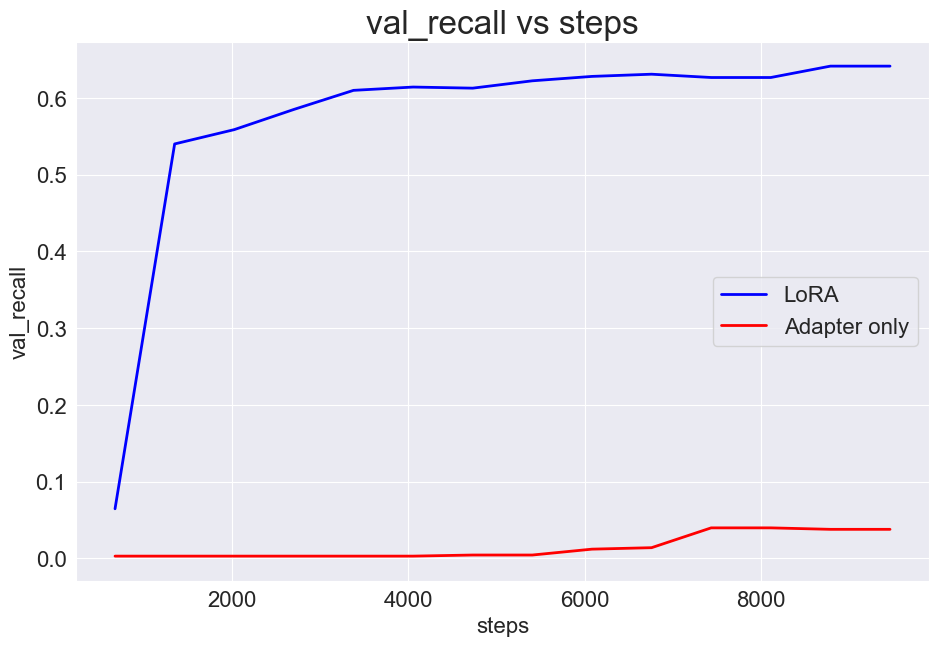

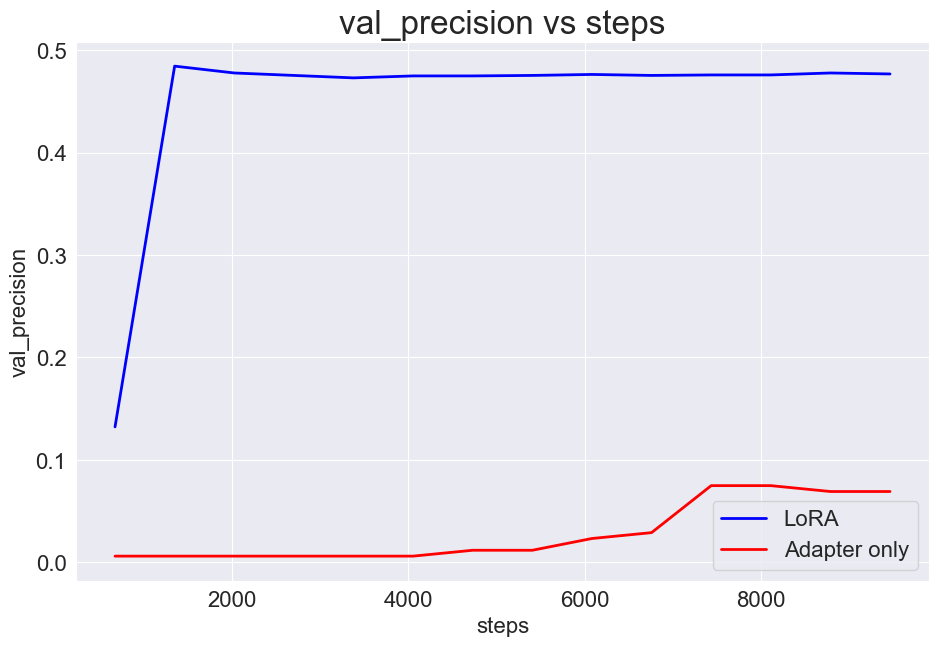

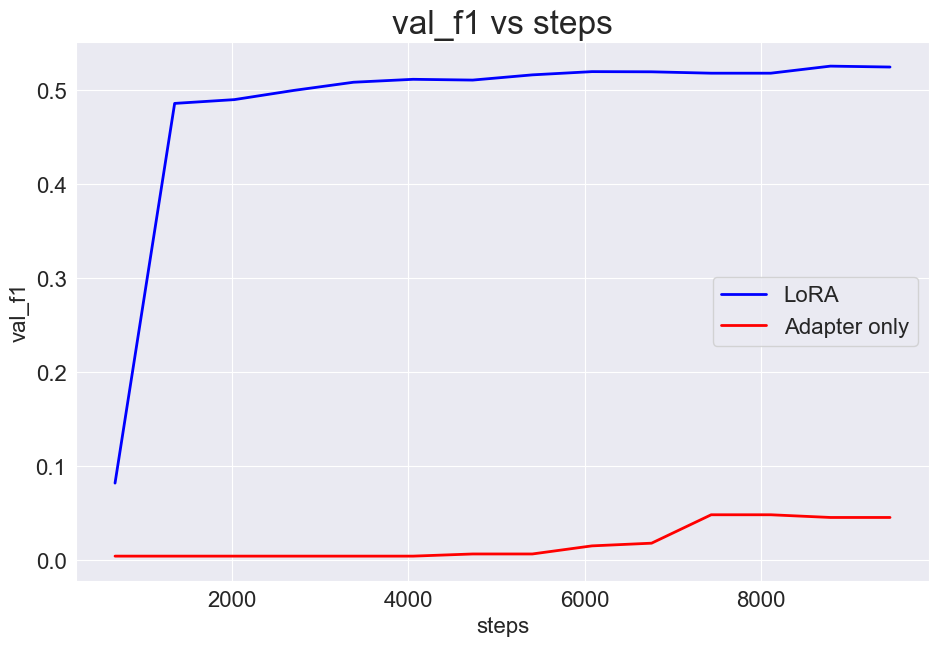

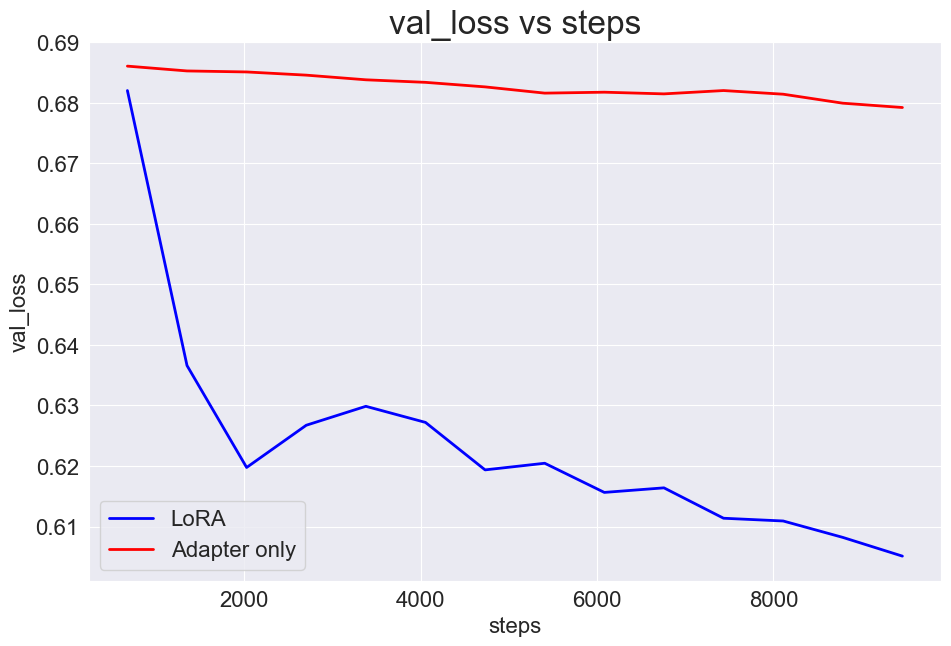

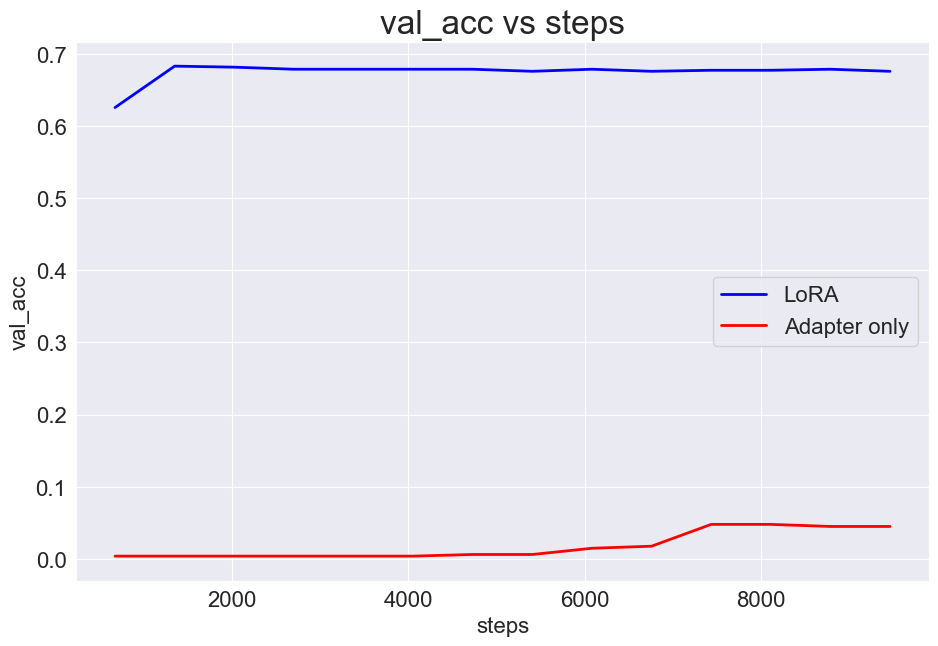

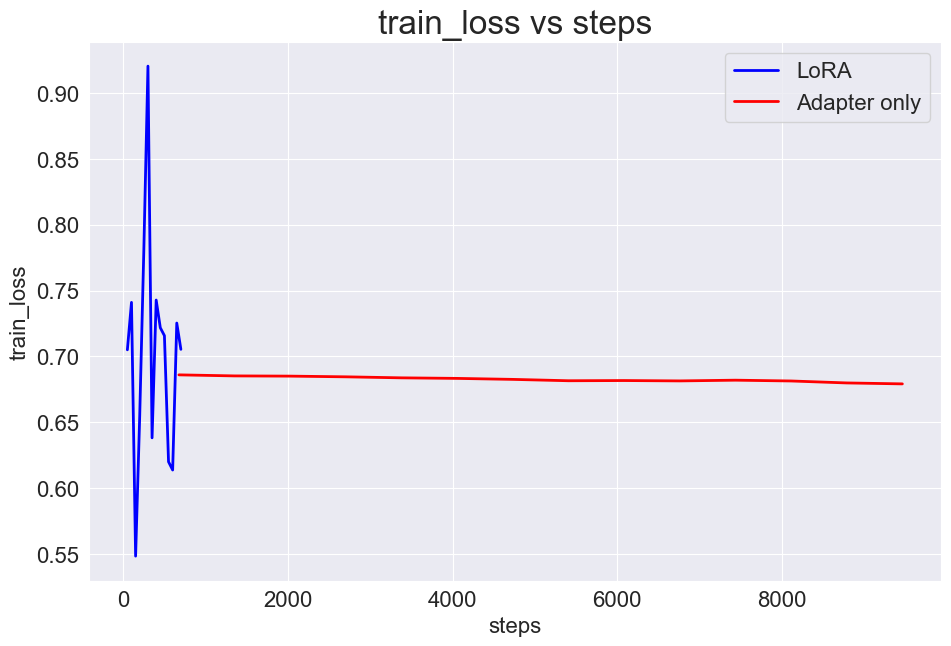

In [10]:
plot_xy(val_recall_lora, val_recall_adapter)
plot_xy(val_precision_lora, val_precision_adapter)
plot_xy(val_f1_lora, val_f1_adapter)
plot_xy(val_loss_lora, val_loss_adapter)
plot_xy(val_acc_lora, val_f1_adapter)
plot_xy(train_loss_lora, val_loss_adapter)